<a href="https://colab.research.google.com/github/Preeyal/Sports-Analytics/blob/main/Sports_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving InjuryRecord.csv to InjuryRecord.csv


In [ ]:
df_injury = pd.read_csv("/content/InjuryRecord.csv", sep =",")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving PlayList.csv to PlayList.csv


In [ ]:
df_playlist = pd.read_csv("/content/PlayList.csv", sep =',')

In [ ]:
df_injury.head()

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1


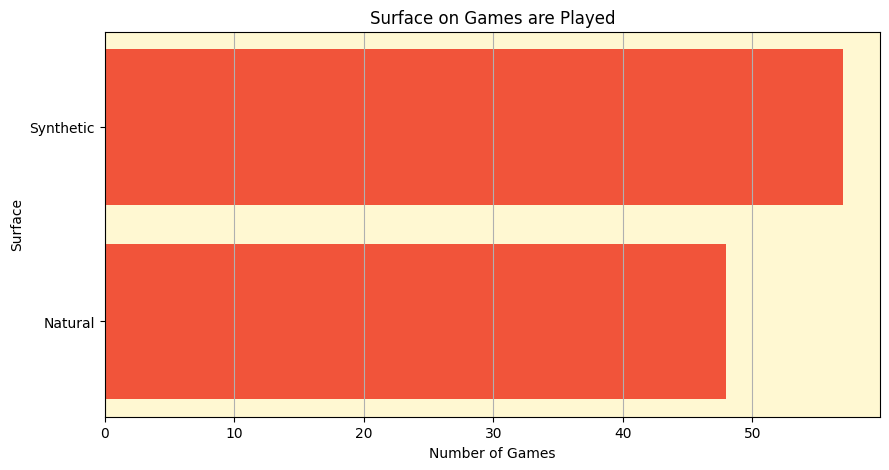

In [ ]:
plt.rcParams['axes.facecolor'] = '#FFF8D2'

# Assuming you have already defined and populated the 'Injury_Rec' DataFrame
surface_counts = df_injury.groupby('Surface').count()['PlayerKey'].sort_values()

plt.figure(figsize=(10, 5))
plt.barh(surface_counts.index, surface_counts, color='#F1543A')
plt.title('Surface on Games are Played')
plt.xlabel('Number of Games')
plt.ylabel('Surface')
plt.grid(axis='x')
plt.show()

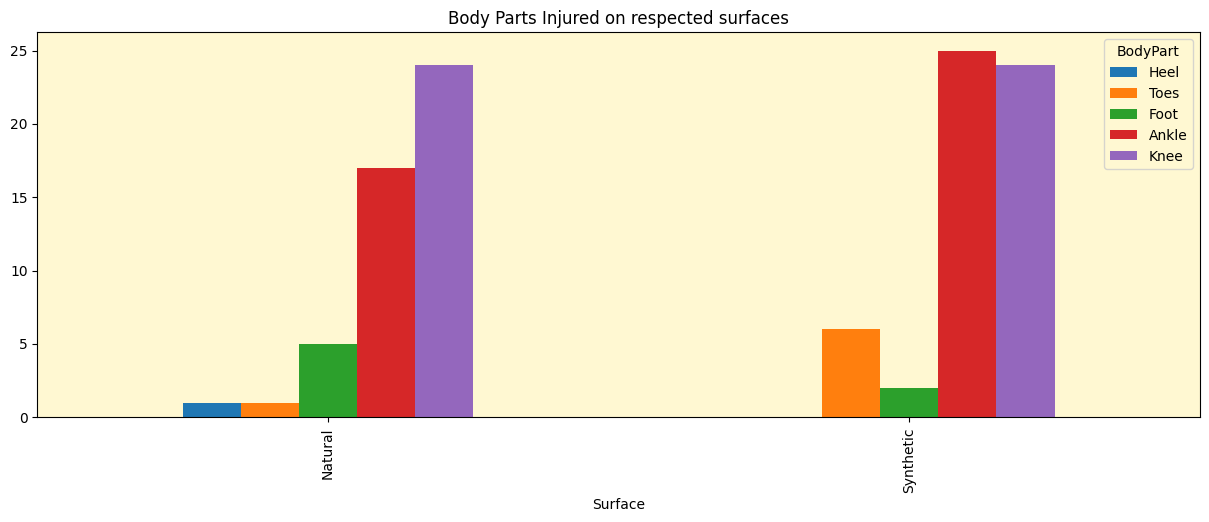

In [ ]:
df_injury.groupby(['BodyPart','Surface']).count() \
.unstack('BodyPart')['PlayerKey'].T.sort_values('Natural')\
.T.sort_values('Ankle').plot(kind='bar', figsize=(15, 5), title='Body Parts Injured on respected surfaces')

plt.show()

In [ ]:
# Assuming you have already defined and populated the 'Injury_Rec' DataFrame
injury_counts = df_injury.groupby(['BodyPart', 'Surface']).count() \
                .unstack('BodyPart')['PlayerKey'].T.sort_values('Natural') \
                .T.sort_values('Ankle')

# Display the injury_counts DataFrame
print(injury_counts)


BodyPart   Heel  Toes  Foot  Ankle  Knee
Surface                                 
Natural     1.0   1.0   5.0   17.0  24.0
Synthetic   NaN   6.0   2.0   25.0  24.0


In [ ]:
import pandas as pd

m_inju_play = pd.merge(df_playlist, df_injury, on='PlayKey', how='left')
m_inju_play['Injury'] = m_inju_play['BodyPart'].apply(lambda x: 1 if x in ['Knee', 'Foot', 'Ankle'] else 0)

m_inju_play_agg = m_inju_play[['StadiumType', 'FieldType', 'Weather', 'Injury', 'PlayType', 'Position', 'PlayerDay', 'Temperature']]

# Change 'Weather' to 1 and 0
m_inju_play_agg['Weather'] = m_inju_play_agg.Weather.isin(['rain', 'Rain', 'Snow', 'snow'])
m_inju_play_agg['Weather'] = m_inju_play_agg['Weather'].apply(lambda x: 1 if x == True else 0)

# Change 'StadiumType' to 1 and 0
m_inju_play_agg['StadiumType'] = m_inju_play_agg.StadiumType.isin(['Outdoor', 'Oudoor', 'Open', 'Ourdoor', 'Out', 'open'])
m_inju_play_agg['StadiumType'] = m_inju_play_agg['StadiumType'].apply(lambda x: 1 if x == True else 0)

# Change 'FieldType' to 1 and 0
m_inju_play_agg['FieldType'] = m_inju_play_agg.FieldType.isin(['Natural'])
m_inju_play_agg['FieldType'] = m_inju_play_agg['FieldType'].apply(lambda x: 1 if x == True else 0)

m_inju_play_agg['PlayType'] = pd.Categorical(m_inju_play_agg.PlayType)
m_inju_play_agg['PlayType_c'] = m_inju_play_agg.PlayType.cat.codes

m_inju_play_agg['Position'] = pd.Categorical(m_inju_play_agg.Position)
m_inju_play_agg['Position_c'] = m_inju_play_agg.Position.cat.codes

# Multiplicate 'StadiumType' with 'Weather'
m_inju_play_agg['Multiplication'] = m_inju_play_agg['StadiumType'] * m_inju_play_agg['Weather']

# Display the modified DataFrame
print(m_inju_play_agg)


<ipython-input-21-decbf54e4a0a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_inju_play_agg['Weather'] = m_inju_play_agg.Weather.isin(['rain', 'Rain', 'Snow', 'snow'])
<ipython-input-21-decbf54e4a0a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_inju_play_agg['Weather'] = m_inju_play_agg['Weather'].apply(lambda x: 1 if x == True else 0)
<ipython-input-21-decbf54e4a0a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

        StadiumType  FieldType  Weather  Injury PlayType Position  PlayerDay  \
0                 1          0        0       0     Pass       QB          1   
1                 1          0        0       0     Pass       QB          1   
2                 1          0        0       0     Rush       QB          1   
3                 1          0        0       0     Rush       QB          1   
4                 1          0        0       0     Pass       QB          1   
...             ...        ...      ...     ...      ...      ...        ...   
267001            1          0        0       0     Pass       DB         99   
267002            1          0        0       0     Pass       DB         99   
267003            1          0        0       0     Pass       DB         99   
267004            1          0        0       0     Pass       DB         99   
267005            1          0        0       0     Rush       DB         99   

        Temperature  PlayType_c  Positi

<ipython-input-21-decbf54e4a0a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_inju_play_agg['FieldType'] = m_inju_play_agg['FieldType'].apply(lambda x: 1 if x == True else 0)
<ipython-input-21-decbf54e4a0a>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_inju_play_agg['PlayType'] = pd.Categorical(m_inju_play_agg.PlayType)
<ipython-input-21-decbf54e4a0a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

features = ['Multiplication', 'FieldType', 'Temperature', 'StadiumType', 'PlayerDay','PlayType_c','Position_c' ]
X = m_inju_play_agg[features]
y = m_inju_play_agg['Injury']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred_log = clf.predict(X_test)
clf.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.999800254675289

Text(0.5, 427.9555555555555, 'Predicted label')

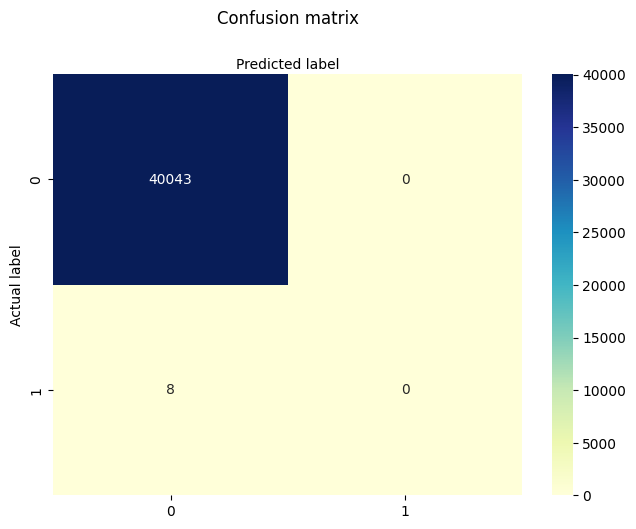

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_log)
#cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
features = ['Multiplication', 'FieldType', 'Temperature', 'StadiumType', 'PlayerDay','PlayType_c','Position_c' ]
X = m_inju_play_agg[features]
y = m_inju_play_agg['Injury']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

clf = RandomForestClassifier(random_state=0, n_estimators=100).fit(X_train, y_train)
y_pred_rf = clf.predict(X_test)
clf.score(X_test, y_test)

0.999800254675289

Text(0.5, 427.9555555555555, 'Predicted label')

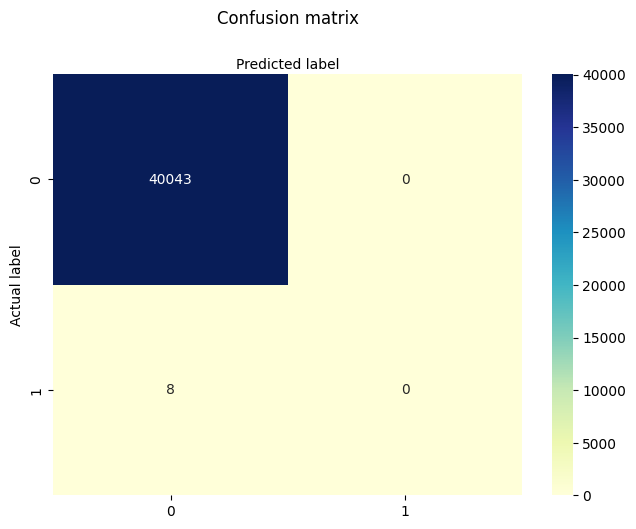

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


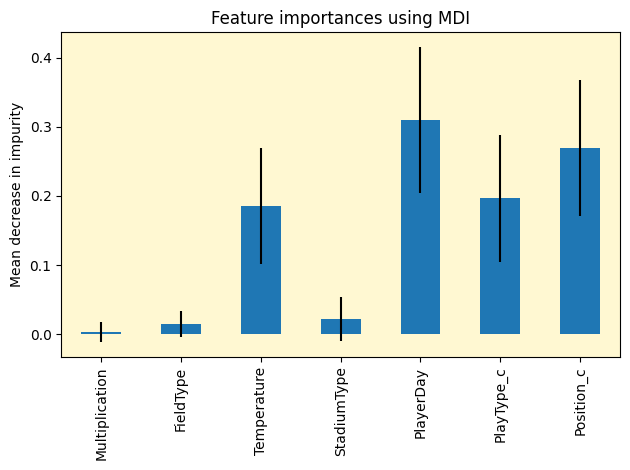

In [ ]:
importances = clf.feature_importances_
forest_importances = pd.Series(importances, index=features)
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()